In [1214]:
from classy import Class
import numpy as np
from matplotlib import pyplot as plt

Potential and derivatives

In [1215]:
from math import pi
csteGrav = 6.6743015e-11
M_pl = 1/np.sqrt(8*pi*csteGrav)
M_pl = 1 
# Units #Internally, the code uses almost everywhere units of Mpc to some power, excepted in the inflation module, where many quantities are in natural units (wrt the true Planck mass).


def V_brane(phi,M4,mu,n):
    return(M4/(1+pow(mu/phi,n)))

def V_shift(phi,phi0,M4,mu,n):
    return(V_brane(phi0-phi,M4,mu,n))

def dV_brane(phi,M4,mu,n):
    factor = M4*n*pow(mu,n)
    denom = pow(phi,n)+pow(mu,n)
    return(factor*pow(phi,n-1)/pow(denom,2))

def ddV_brane(phi,M4,mu,n):
    factor = M4*n*pow(mu,n)
    factor2 = (n-1)*pow(mu,n)-(n+1)*pow(phi,n)
    denom = pow(mu,n)+pow(phi,n)
    return(factor*factor2/pow(denom,3))

Slow-roll parameters

In [1216]:

def epsilon1(phi,M4,mu,n):
    x=phi/mu
    factor=pow(n*M_pl/mu, 2)
    return( 0.5*factor/pow(x*(pow(x,n)+1),2)  )

def epsilon2(phi,M4,mu,n):
    x=phi/mu
    factor = 2*n*pow(M_pl/mu,2)
    numerator = (n+1)*pow(x,n)+1
    denominator = x*(pow(x,n)+1)
    return( factor*numerator/pow(denominator,2) )

def epsilon3(phi,M4,mu,n):
    x=phi/mu
    factor = n*pow(M_pl/mu,2)
    numerator = 2 + (n-4)*(n+1)*pow(x,n)  + (n+1)*(n+2)*pow(x,2*n)
    denominator = pow( x*(pow(x,n)+1) , 2)
    denominator = denominator* ((n+1)*pow(x,n) + 1 )
    return( factor * numerator / denominator)

In [1217]:
def epsilon1_true(phi,M4,mu,n):
    factor = 0.5*pow(M_pl,2)
    return(factor*pow(dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n),2)  )

def epsilon2_true(phi,M4,mu,n):
    factor = 2*pow(M_pl,2)
    quotient1 = ddV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n)
    quotient2 = dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n)
    return(factor*(pow(quotient2,2) - quotient1))

In [1218]:

def epsilon1_shift(phi,phi0,M4,mu,n):
    return(epsilon1(phi0-phi,M4,mu,n))

def epsilon2_shift(phi,phi0,M4,mu,n):
    return(epsilon2(phi0-phi,M4,mu,n))

def epsilon3_shift(phi,phi0,M4,mu,n):
    return(epsilon3(phi0-phi,M4,mu,n))

Calculate $\phi_{start}$

In [1219]:
## précision nécessaire pour pouvoir atteindre phi tel que  V(phi) proche de M4   (on utilise cette précision dans la fonction calculate phi start)
## Attention, si et seulement si   M_pl = 1/sqrt(8*pi*G)
def precision_mu(mu):
    return(pow(10,(3+4*(np.log10(mu/M_pl)+3))))
    return(pow(10,-(49-N*(np.log10(mu/M_pl)+3))))

In [1220]:
## précision nécessaire pour pouvoir atteindre phi tel que  V(phi) proche de M4   (on utilise cette précision dans la fonction calculate phi start)
## Attention, si et seulement si   M_pl = 1
def precision_mu(mu):
    return(pow(10,(-14+4*(np.log10(mu/M_pl)+3))))

In [1221]:
#Calcule phi tel que V(phi) proche de M4 ... la précision recquise est expliquée après  (en fait elle dépend de M4 et donc de mu  (car M4/mu4 = 16/27))
def calculate_phi_start_BI(M4,mu,n,precision):
    return(mu*pow(M4/precision,1/n))

Calculate $\phi_{end}$

In [1222]:
def calculate_phi_end_BI(M4,mu,n,precision):
    N0=100000
    phi_deb = calculate_phi_start_BI(M4,mu,n,precision)
    list_phi = np.linspace(1e-50,phi_deb,N0)

    V = V_brane(list_phi,M4,mu,n)
    E1 = epsilon1_true(list_phi,M4,mu,n)
 
    i_gauche = 0
    i_droite = N0-1

    i_mid = (i_gauche+i_droite)//2
    # print(i_gauche,i_mid,i_droite)
    # print('epsilon',E1[i_mid])
    while (i_droite-i_gauche)>1:
        if E1[i_mid]>1:
            i_gauche=i_mid
        else:
            i_droite=i_mid
        
        i_mid = (i_gauche+i_droite)//2
        # print(i_gauche,i_mid,i_droite)   
        # print('epsilon',E1[i_mid])

    # print(i_gauche,i_mid,i_droite)
    # print('epsilon',E1[i_mid])
    # print('epsilon',E1[i_mid+1])
    return(list_phi[i_mid+1])

Essais Calcul $\phi_{start}$

In [1223]:
def calculate_and_plot_phi_end_BI(M4,mu,n,precision):
    N0=100000
    phi_deb = calculate_phi_start_BI(M4,mu,n,precision)
    list_phi = np.linspace(1e-50,phi_deb,N0)

    V = V_brane(list_phi,M4,mu,n)
    # E1 = pow(mu/M_pl,2)*epsilon1_true(list_phi,M4,mu,n)
    E1 = epsilon1_true(list_phi,M4,mu,n)

    fig = plt.figure(figsize=(8,5))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    
    ax1.plot(list_phi/mu,V/M4,color="b")
    ax1.set_ylabel(r'$V(\phi)$')
    ax1.set_xlabel(r'$\phi/\mu$' )

    ax2.plot(list_phi/mu,E1,color="b")
    # ax2.plot(list_phi/mu,pow(mu/M_pl,2)*E1,color="b")
    ax2.set_ylabel(r'$\epsilon_1(\phi)$')
    ax2.set_xlabel(r'$\phi/\mu$' )
    ax2.set_ylim([0,2])

    plt.show()

    i_gauche = 0
    i_droite = N0-1

    i_mid = (i_gauche+i_droite)//2
    # print(i_gauche,i_mid,i_droite)
    # print('epsilon',E1[i_mid])
    while (i_droite-i_gauche)>1:
        if E1[i_mid]>1:
            i_gauche=i_mid
        else:
            i_droite=i_mid
        
        i_mid = (i_gauche+i_droite)//2
        # print(i_gauche,i_mid,i_droite)   
        # print('epsilon',E1[i_mid])

    # print(i_gauche,i_mid,i_droite)
    # print('epsilon',E1[i_mid])
    # print('epsilon',E1[i_mid+1])
    return(list_phi[i_mid+1])



In [1224]:
def essai_phi_end():
    n=4
    liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    liste_phi_deb = [calculate_phi_start_BI(liste_M4[i],liste_mu[i],n,liste_eta[i]) for i in range(len(liste_mu)) ]

    for i in range(len(liste_mu)):
        M4 = liste_M4[i]
        mu = liste_mu[i]
        eta = liste_eta[i]
        calculate_and_plot_phi_end_BI(M4,mu,n,eta)


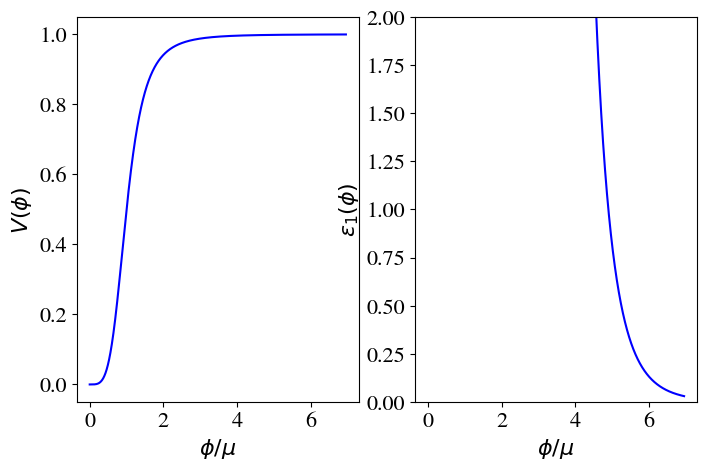

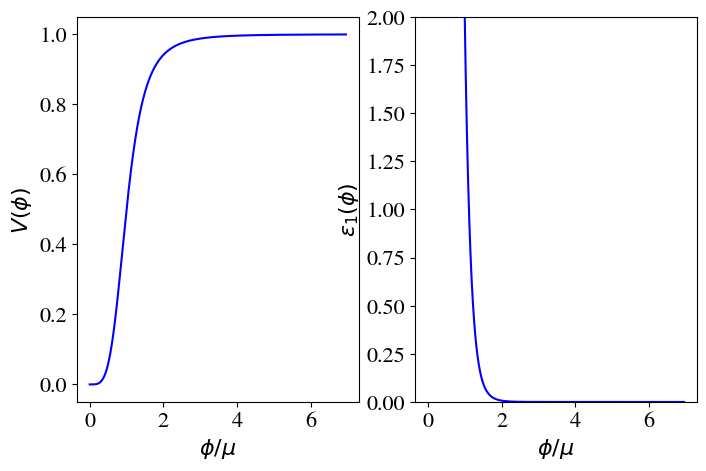

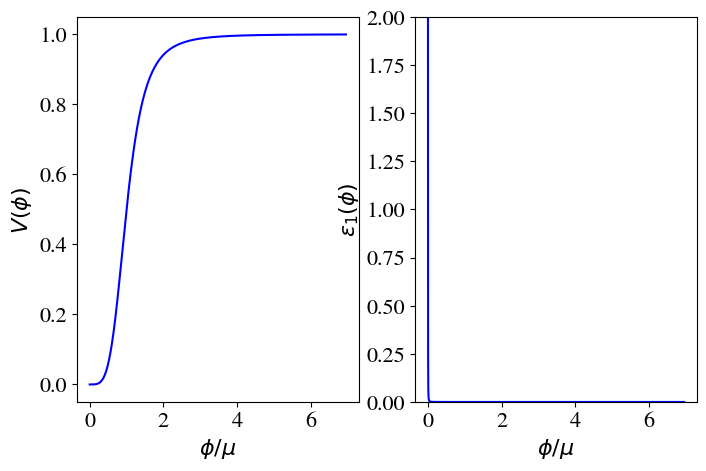

In [1225]:
essai_phi_end())

Essais

In [1226]:
def couleur(i,N):
    myColor = plt.get_cmap("Dark2")
    return("b")
    return(myColor((i+1)/N))

Essais : plot le potentiel, celui obtenu par symmétrie miroir et les slow-roll parameters entre $\phi_{end}$ tel que $\epsilon_H(\phi_{end})=1$ et $\phi_{start}$ tel que $V(\phi_{start}) \approx M^4 $

In [1227]:
def plot_BI_start_end(M4,mu,n,eta,couleur):
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(3,3,1)
    ax2 = plt.subplot(3,3,2)
    ax3 = plt.subplot(3,3,4)
    ax4 = plt.subplot(3,3,5)
    ax5 = plt.subplot(3,3,6)
    ax6 = plt.subplot(3,3,7)
    ax7 = plt.subplot(3,3,8)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta)  #2 arbitraire, pcq c mieux
    phi_end = calculate_phi_end_BI(M4,mu,n,eta)
    
    list_phi = np.linspace(phi_end,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1(list_phi,M4,mu,n)
    E2 = epsilon2(list_phi,M4,mu,n)
    E3 = epsilon3(list_phi,M4,mu,n)
    E1bis = epsilon1_true(list_phi,M4,mu,n)
    E2bis = epsilon2_true(list_phi,M4,mu,n)

    ax1.plot(list_phi/mu,V1/M4,color=couleur)
    ax1.set_ylabel(r'$V(\phi)$')
    ax1.set_xlabel(r'$\phi/\mu$')
    
    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$V(\phi_0-\phi)$')
    ax2.set_xlabel(r'$\phi/\mu$')

    # ax3.plot(list_phi/mu,E1,color=couleur)
    # ax4.plot(list_phi/mu,E2,color=couleur)
    # ax5.plot(list_phi/mu,E3,color=couleur)
    # ax6.plot(list_phi/mu,E1bis,color="r")
    # ax7.plot(list_phi/mu,E2bis,color="r")
    ax3.plot(list_phi/mu,E1,color=couleur)
    ax4.plot(list_phi/mu,E2,color=couleur)
    ax5.plot(list_phi/mu,E3,color=couleur)
    ax6.plot(list_phi/mu,E1bis,color="r")
    ax7.plot(list_phi/mu,E2bis,color="r")

    ax3.set_ylabel(r"$\epsilon_1(\phi)$")
    ax4.set_ylabel(r"$\epsilon_2(\phi)$")
    ax5.set_ylabel(r"$\epsilon_3(\phi)$")
    ax6.set_ylabel(r"$\epsilon_1(\phi)$")
    ax7.set_ylabel(r"$\epsilon_2(\phi)$")

    ax3.set_ylim([0,2])
    ax4.set_ylim([0,2])
    ax5.set_ylim([0,2])
    ax6.set_ylim([0,2])
    ax7.set_ylim([0,2])

    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')
    ax7.set_xlabel(r'$\phi / \mu$')

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

    

In [1228]:
def plot_BI_rescaled_start_end(M4,mu,n,eta,couleur):
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(3,3,1)
    ax2 = plt.subplot(3,3,2)
    ax3 = plt.subplot(3,3,4)
    ax4 = plt.subplot(3,3,5)
    ax5 = plt.subplot(3,3,6)
    ax6 = plt.subplot(3,3,7)
    ax7 = plt.subplot(3,3,8)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta)  #2 arbitraire, pcq c mieux
    phi_end = calculate_phi_end_BI(M4,mu,n,eta)
    
    list_phi = np.linspace(phi_end,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1(list_phi,M4,mu,n)
    E2 = epsilon2(list_phi,M4,mu,n)
    E3 = epsilon3(list_phi,M4,mu,n)
    E1bis = epsilon1_true(list_phi,M4,mu,n)
    E2bis = epsilon2_true(list_phi,M4,mu,n)

    ax1.plot(list_phi/mu,V1/M4,color=couleur)
    ax1.set_ylabel(r'$V(\phi)$')
    ax1.set_xlabel(r'$\phi/\mu$')
    
    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$V(\phi_0-\phi)$')
    ax2.set_xlabel(r'$\phi/\mu$')

    # ax3.plot(list_phi/mu,E1,color=couleur)
    # ax4.plot(list_phi/mu,E2,color=couleur)
    # ax5.plot(list_phi/mu,E3,color=couleur)
    # ax6.plot(list_phi/mu,E1bis,color="r")
    # ax7.plot(list_phi/mu,E2bis,color="r")
    ax3.plot(list_phi/mu,pow(mu/M_pl,2)*E1,color=couleur)
    ax4.plot(list_phi/mu,pow(mu/M_pl,2)*E2,color=couleur)
    ax5.plot(list_phi/mu,pow(mu/M_pl,2)*E3,color=couleur)
    ax6.plot(list_phi/mu,pow(mu/M_pl,2)*E1bis,color="r")
    ax7.plot(list_phi/mu,pow(mu/M_pl,2)*E2bis,color="r")

    ax3.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    ax4.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")
    ax5.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_3(\phi)$")
    ax6.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    ax7.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")

    ax3.set_ylim([0,5])
    ax4.set_ylim([0,5])
    ax5.set_ylim([0,5])
    ax6.set_ylim([0,5])
    ax7.set_ylim([0,5])

    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')
    ax7.set_xlabel(r'$\phi / \mu$')

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

In [1229]:
def essai_plot_V_and_SRP_BI():
    n=4
    liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        plot_BI_start_end(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,len(liste_mu)))

def essai_plot_V_and_rescaled_SRP_BI():
    n=4
    liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        plot_BI_rescaled_start_end(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,len(liste_mu)))


/tmp/ipykernel_20802/1761861699.py:9: RuntimeWarning: divide by zero encountered in divide
  return(M4/(1+pow(mu/phi,n)))


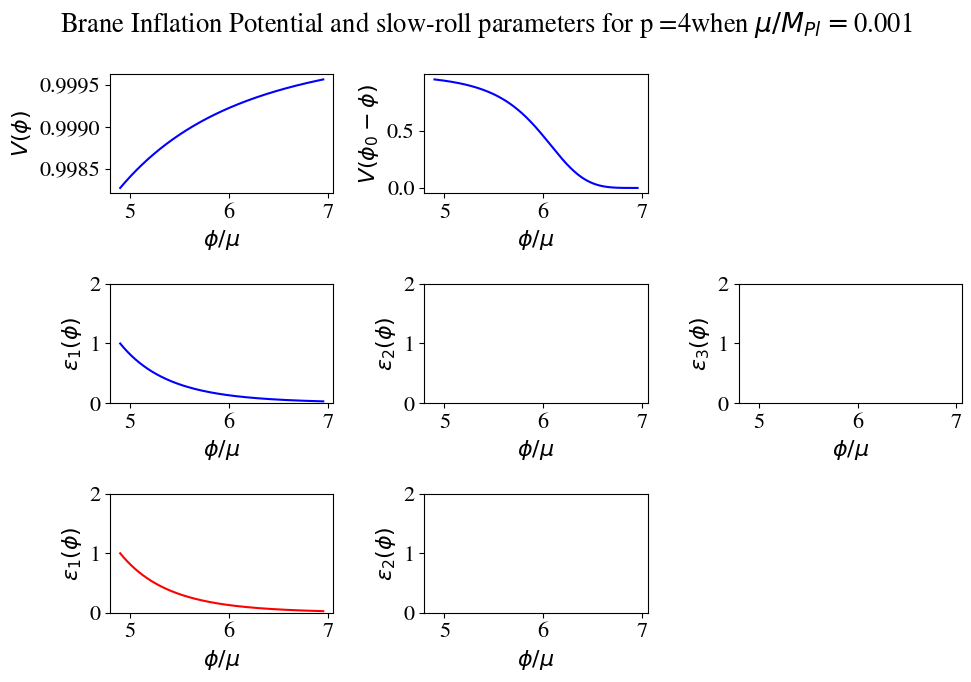

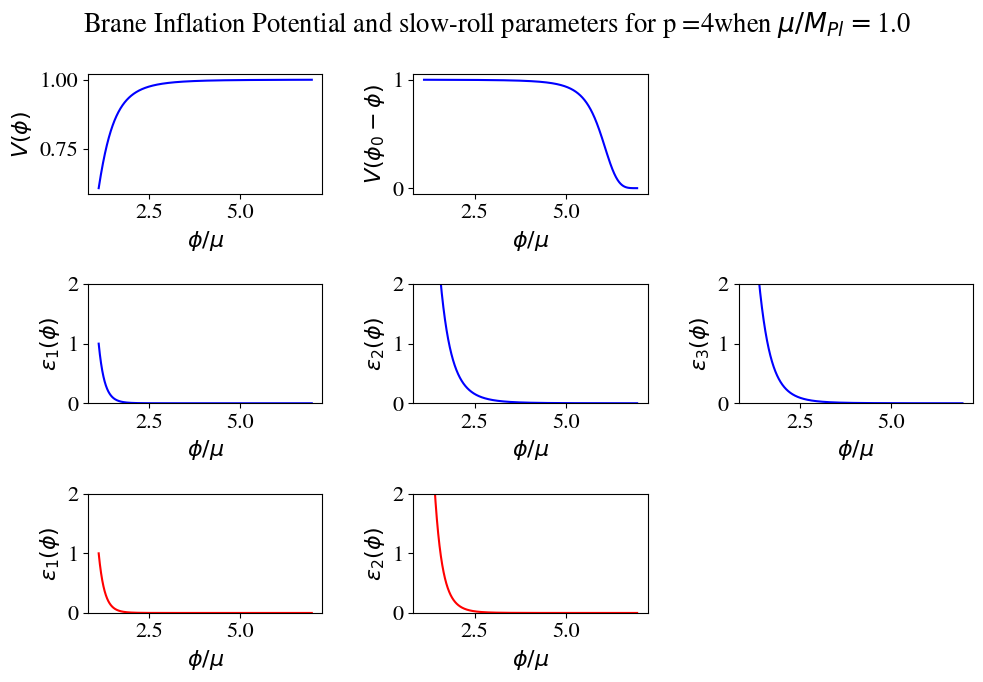

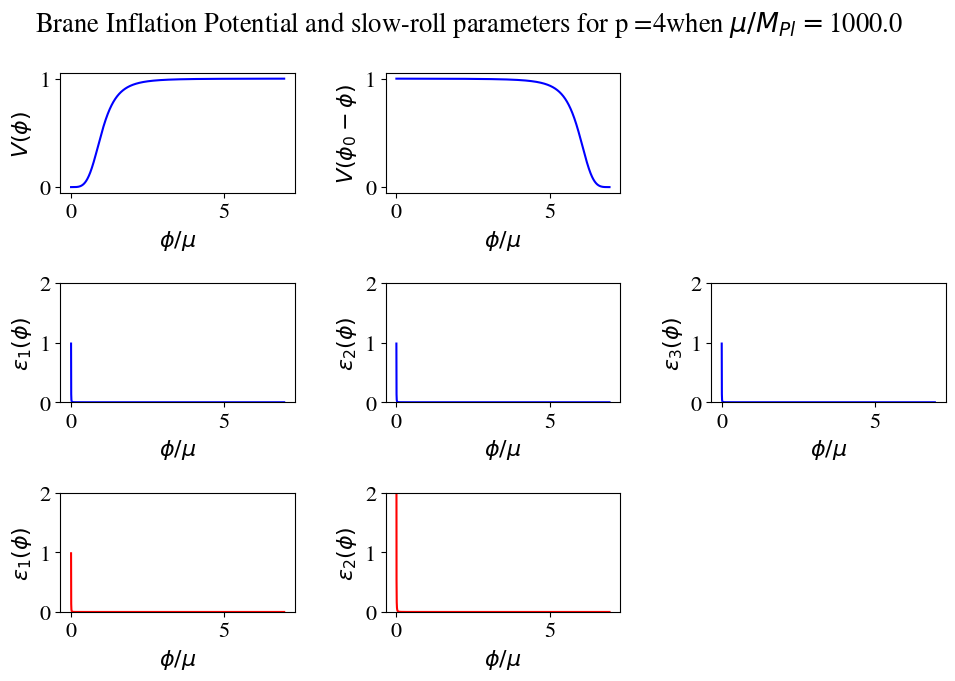

In [1230]:
essai_plot_V_and_SRP_BI()

/tmp/ipykernel_20802/1761861699.py:9: RuntimeWarning: divide by zero encountered in divide
  return(M4/(1+pow(mu/phi,n)))


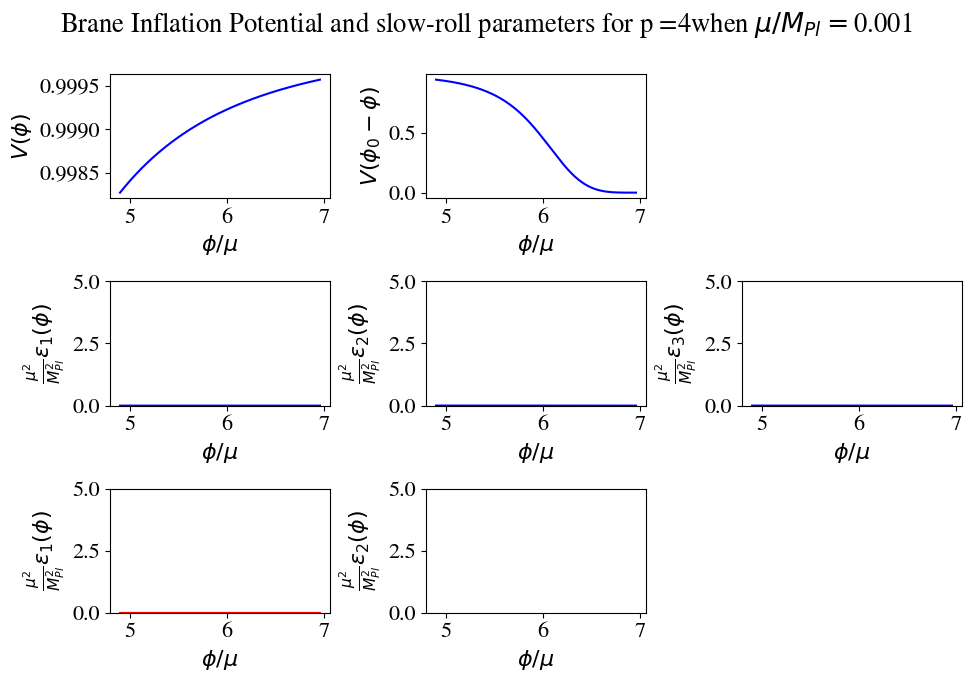

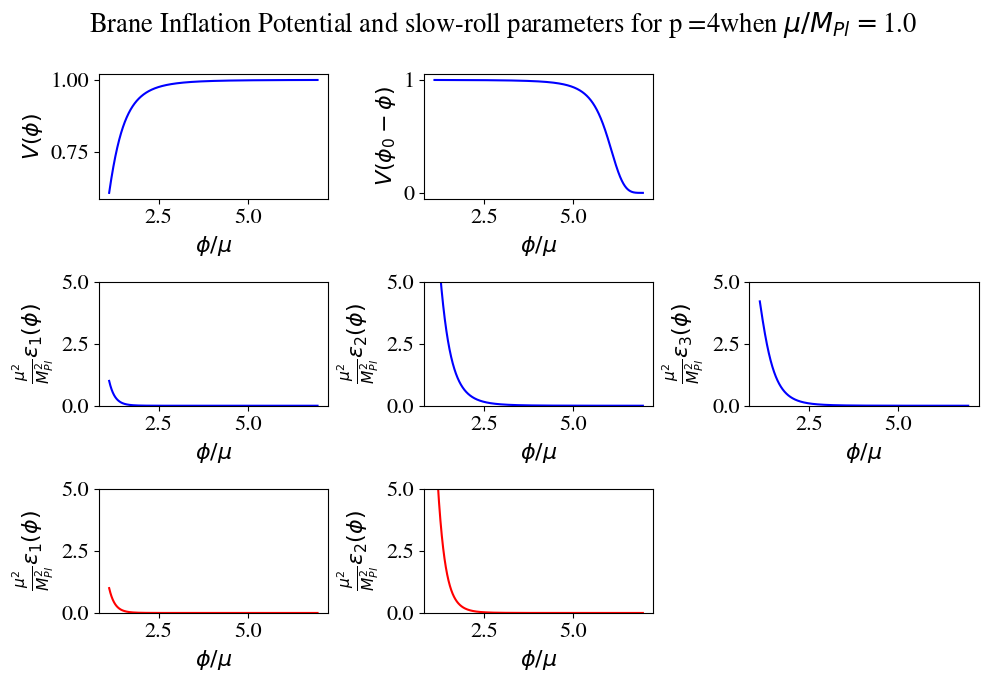

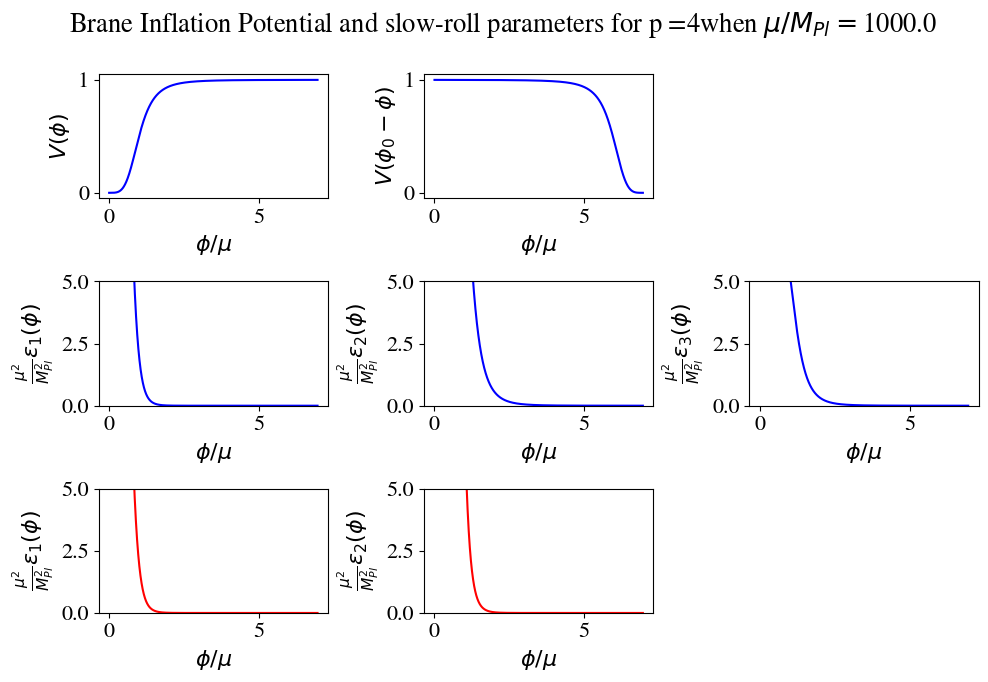

In [1231]:
essai_plot_V_and_rescaled_SRP_BI()

Essais : plot le potentiel, celui obtenu par symmétrie miroir et les slow-roll parameters entre $\phi = 0^+$ et $\phi_{start}$ tel que $V(\phi_{start}) \approx M^4 $

In [1232]:
def plot_all_BI_wrt_mu(M4,mu,n,eta,couleur):
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(3,3,1)
    ax2 = plt.subplot(3,3,2)
    ax3 = plt.subplot(3,3,4)
    ax4 = plt.subplot(3,3,5)
    ax5 = plt.subplot(3,3,6)
    ax6 = plt.subplot(3,3,7)
    ax7 = plt.subplot(3,3,8)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta)  #2 arbitraire, pcq c mieux

    list_phi = np.linspace(0,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1(list_phi,M4,mu,n)
    E2 = epsilon2(list_phi,M4,mu,n)
    E3 = epsilon3(list_phi,M4,mu,n)
    E1bis = epsilon1_true(list_phi,M4,mu,n)
    E2bis = epsilon2_true(list_phi,M4,mu,n)

    ax1.plot(list_phi/mu,V1/M4,color=couleur)
    ax1.set_ylabel(r'$V(\phi)$')
    ax1.set_xlabel(r'$\phi/\mu$')
    
    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$V(\phi_0-\phi)$')
    ax2.set_xlabel(r'$\phi/\mu$')

    # ax3.plot(list_phi/mu,E1,color=couleur)
    # ax4.plot(list_phi/mu,E2,color=couleur)
    # ax5.plot(list_phi/mu,E3,color=couleur)
    # ax6.plot(list_phi/mu,E1bis,color="r")
    # ax7.plot(list_phi/mu,E2bis,color="r")
    ax3.plot(list_phi/mu,pow(mu/M_pl,2)*E1,color=couleur)
    ax4.plot(list_phi/mu,pow(mu/M_pl,2)*E2,color=couleur)
    ax5.plot(list_phi/mu,pow(mu/M_pl,2)*E3,color=couleur)
    ax6.plot(list_phi/mu,pow(mu/M_pl,2)*E1bis,color="r")
    ax7.plot(list_phi/mu,pow(mu/M_pl,2)*E2bis,color="r")

    ax3.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    ax4.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")
    ax5.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_3(\phi)$")
    ax6.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    ax7.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")

    # ax3.set_ylim([0,5])
    # ax4.set_ylim([0,5])
    # ax5.set_ylim([0,5])
    # ax6.set_ylim([0,5])
    # ax7.set_ylim([0,5])

    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')
    ax7.set_xlabel(r'$\phi / \mu$')

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

In [1233]:
def essai_precision():
    n=4
    liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    liste_phi_deb = [calculate_phi_start_BI(liste_M4[i],liste_mu[i],n,liste_eta[i]) for i in range(len(liste_mu)) ]

    for i in range(len(liste_mu)):
        print(liste_mu[i]/M_pl,liste_eta[i],liste_phi_deb[i]/M_pl)
essai_precision()

0.001 1e-14 0.006954709414939334
1.0 0.01 6.954709414939334
1000.0 10000000000.0 6954.709414939334


In [1295]:
def essai_ALL_wrt_mu():
    n=4
    liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        plot_all_BI_wrt_mu(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,len(liste_mu)))


In [1296]:
essai_ALL_wrt_mu()

TypeError: precision_mu() missing 1 required positional argument: 'N'

Idem, mais on hachure entre $O^+$ et $\phi_{end}$

In [1236]:
def plot_all_BI_wrt_mu(M4,mu,n,eta,couleur):
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(3,3,1)
    ax2 = plt.subplot(3,3,2)
    ax3 = plt.subplot(3,3,4)
    ax4 = plt.subplot(3,3,5)
    ax5 = plt.subplot(3,3,6)
    ax6 = plt.subplot(3,3,7)
    ax7 = plt.subplot(3,3,8)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta)  #2 arbitraire, pcq c mieux
    phi_end = calculate_phi_end_BI(M4,mu,n,eta)

    list_phi = np.linspace(0,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1(list_phi,M4,mu,n)
    E2 = epsilon2(list_phi,M4,mu,n)
    E3 = epsilon3(list_phi,M4,mu,n)
    E1bis = epsilon1_true(list_phi,M4,mu,n)
    E2bis = epsilon2_true(list_phi,M4,mu,n)

    ax1.plot(list_phi/mu,V1/M4,color=couleur)
    ax1.set_ylabel(r'$V(\phi)$')
    ax1.set_xlabel(r'$\phi/\mu$')
    
    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$V(\phi_0-\phi)$')
    ax2.set_xlabel(r'$\phi/\mu$')

    # ax3.plot(list_phi/mu,E1,color=couleur)
    # ax4.plot(list_phi/mu,E2,color=couleur)
    # ax5.plot(list_phi/mu,E3,color=couleur)
    # ax6.plot(list_phi/mu,E1bis,color="r")
    # ax7.plot(list_phi/mu,E2bis,color="r")
    ax3.plot(list_phi/mu,E1,color=couleur)
    ax4.plot(list_phi/mu,E2,color=couleur)
    ax5.plot(list_phi/mu,E3,color=couleur)
    ax6.plot(list_phi/mu,E1bis,color="r")
    ax7.plot(list_phi/mu,E2bis,color="r")
    
    ax3.axhline(y=1,color='grey',linestyle='--')
    ax6.axhline(y=1,color='grey',linestyle='--')

    ax3.set_ylabel(r"$\epsilon_1(\phi)$")
    ax4.set_ylabel(r"$\epsilon_2(\phi)$")
    ax5.set_ylabel(r"$\epsilon_3(\phi)$")
    ax6.set_ylabel(r"$\epsilon_1(\phi)$")
    ax7.set_ylabel(r"$\epsilon_2(\phi)$")
    # ax3.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    # ax4.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")
    # ax5.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_3(\phi)$")
    # ax6.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    # ax7.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")

    ax3.set_ylim([0,2])
    ax4.set_ylim([0,2])
    ax5.set_ylim([0,2])
    ax6.set_ylim([0,2])
    ax7.set_ylim([0,2]) 

    ax1.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax2.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax3.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax4.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax5.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax6.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax7.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")

    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')
    ax7.set_xlabel(r'$\phi / \mu$')

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    
    ax1.legend(loc='lower right')
    ax2.legend(loc='lower left')
    ax3.legend(loc='best')
    ax4.legend(loc='best')
    ax5.legend(loc='best')
    ax6.legend(loc='best')
    ax7.legend(loc='best')

    plt.tight_layout()
    plt.show()

In [1237]:
def plot_everything_BI():
    n=4
    liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        plot_all_BI_wrt_mu(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,len(liste_mu)))


/tmp/ipykernel_20802/1761861699.py:9: RuntimeWarning: divide by zero encountered in divide
  return(M4/(1+pow(mu/phi,n)))
/tmp/ipykernel_20802/4034785085.py:4: RuntimeWarning: divide by zero encountered in divide
  return( 0.5*factor/pow(x*(pow(x,n)+1),2)  )
/tmp/ipykernel_20802/4034785085.py:11: RuntimeWarning: divide by zero encountered in divide
  return( factor*numerator/pow(denominator,2) )
/tmp/ipykernel_20802/4034785085.py:19: RuntimeWarning: divide by zero encountered in divide
  return( factor * numerator / denominator)
/tmp/ipykernel_20802/544478273.py:3: RuntimeWarning: invalid value encountered in divide
  return(factor*pow(dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n),2)  )
/tmp/ipykernel_20802/544478273.py:7: RuntimeWarning: divide by zero encountered in divide
  quotient1 = ddV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n)
/tmp/ipykernel_20802/544478273.py:8: RuntimeWarning: invalid value encountered in divide
  quotient2 = dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n)


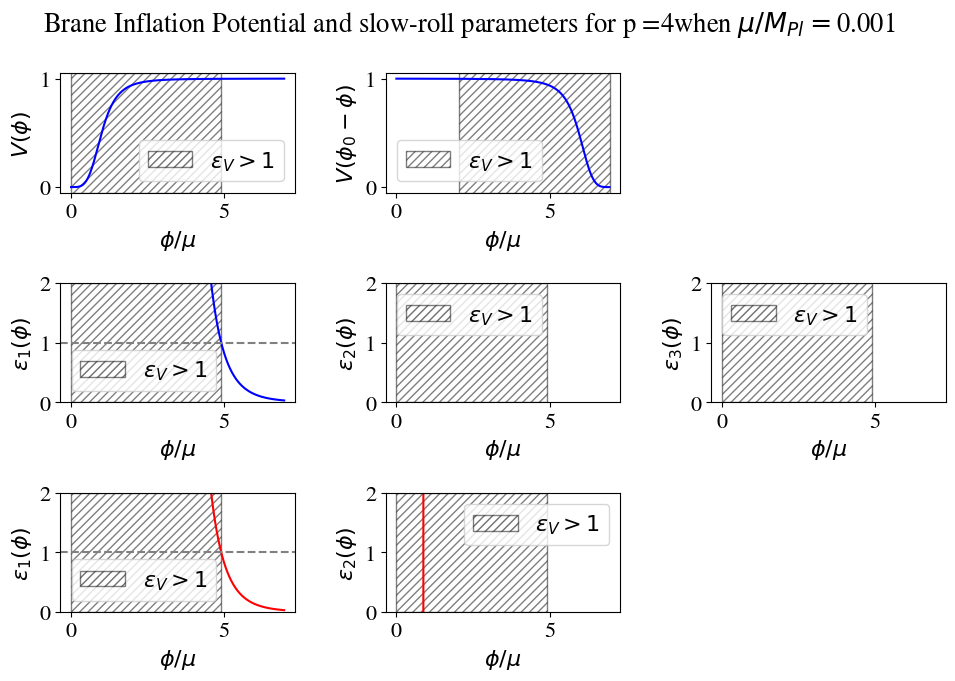

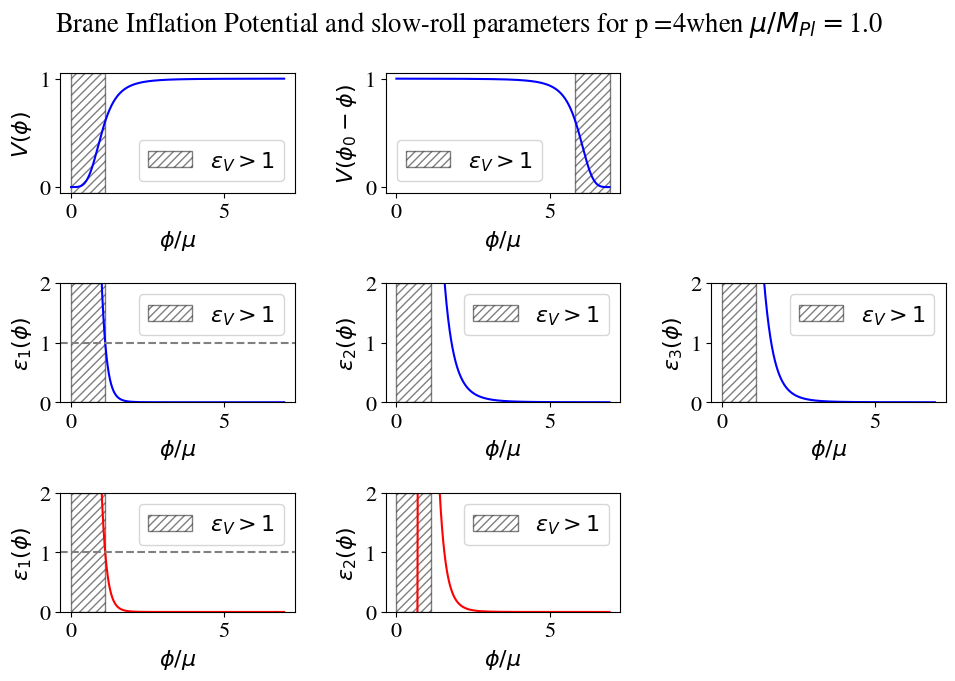

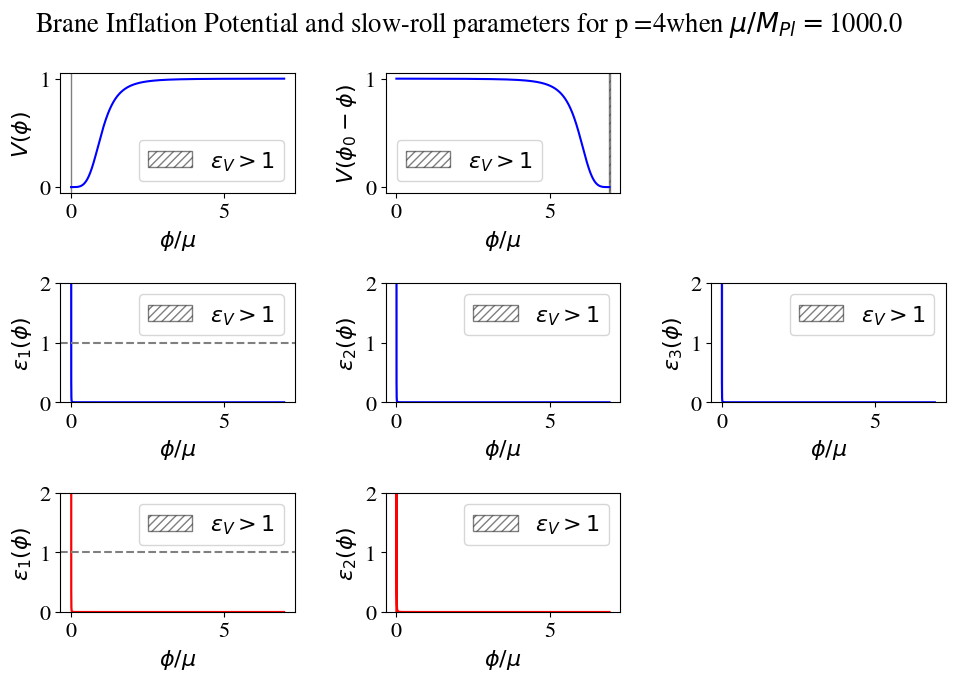

In [1238]:
plot_everything_BI()

Plot flipped potential, and derivatives to check an error

In [1239]:
def plot_flippedBI_and_dV(M4,mu,n,eta,couleur):
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,4)
    ax5 = plt.subplot(2,3,5)
    ax6 = plt.subplot(2,3,6)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta) 
    phi_end = calculate_phi_end_BI(M4,mu,n,eta)

    list_phi = np.linspace(0,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1_shift(list_phi,phi_deb,M4,mu,n)
    E2 = epsilon2_shift(list_phi,phi_deb,M4,mu,n)
    E3 = epsilon3_shift(list_phi,phi_deb,M4,mu,n)
    E1bis = epsilon1_true(list_phi,M4,mu,n)

    dV1 = -dV_brane(phi_deb-list_phi,M4,mu,n)

    ax1.plot(list_phi/mu,V1/M4,color=couleur)
    ax1.set_ylabel(r'$\frac{1}{M^4} V(\phi)$')
    ax1.set_xlabel(r'$\phi / \mu$')

    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$\frac{1}{M^4} V(\phi_0 - \phi)$')
    ax2.set_xlabel(r'$\phi / \mu$')

    ax3.plot(list_phi/mu,dV1/M4,color=couleur)
    ax3.set_ylabel(r'$\frac{dV}{d\phi}(\phi_0-\phi)$')
    ax3.set_xlabel(r'$\phi / \mu$')

    ax4.plot(list_phi/mu,E1,color="b")
    ax5.plot(list_phi/mu,E2,color="b")
    ax6.plot(list_phi/mu,E3,color="b")
    ax4.set_ylabel(r"$\epsilon_1(\phi_0-\phi)$")
    ax5.set_ylabel(r"$\epsilon_2(\phi_0-\phi)$")
    ax6.set_ylabel(r"$\epsilon_3(\phi_0-\phi)$")

    ax4.axhline(y=1,color='grey',linestyle='--')
    ax5.axhline(y=1,color='grey',linestyle='--')
    ax6.axhline(y=1,color='grey',linestyle='--')
    
    ax4.set_ylim([0,2])
    ax5.set_ylim([0,2])
    ax6.set_ylim([0,2])
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')

    
    ax1.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax2.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax3.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax4.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax5.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax6.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    
    ax1.set_xlim([0,phi_deb/mu])
    ax2.set_xlim([0,phi_deb/mu])
    ax3.set_xlim([0,phi_deb/mu])
    ax4.set_xlim([0,phi_deb/mu])
    ax5.set_xlim([0,phi_deb/mu])
    ax6.set_xlim([0,phi_deb/mu])

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    
    ax1.legend(loc='lower right')
    ax2.legend(loc='lower left')
    ax3.legend(loc='lower left')
    ax4.legend(loc='lower left')
    ax5.legend(loc='upper left')
    ax6.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_20802/1761861699.py:9: RuntimeWarning: divide by zero encountered in divide
  return(M4/(1+pow(mu/phi,n)))
/tmp/ipykernel_20802/4034785085.py:4: RuntimeWarning: divide by zero encountered in divide
  return( 0.5*factor/pow(x*(pow(x,n)+1),2)  )
/tmp/ipykernel_20802/4034785085.py:11: RuntimeWarning: divide by zero encountered in divide
  return( factor*numerator/pow(denominator,2) )
/tmp/ipykernel_20802/4034785085.py:19: RuntimeWarning: divide by zero encountered in divide
  return( factor * numerator / denominator)
/tmp/ipykernel_20802/544478273.py:3: RuntimeWarning: invalid value encountered in divide
  return(factor*pow(dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n),2)  )


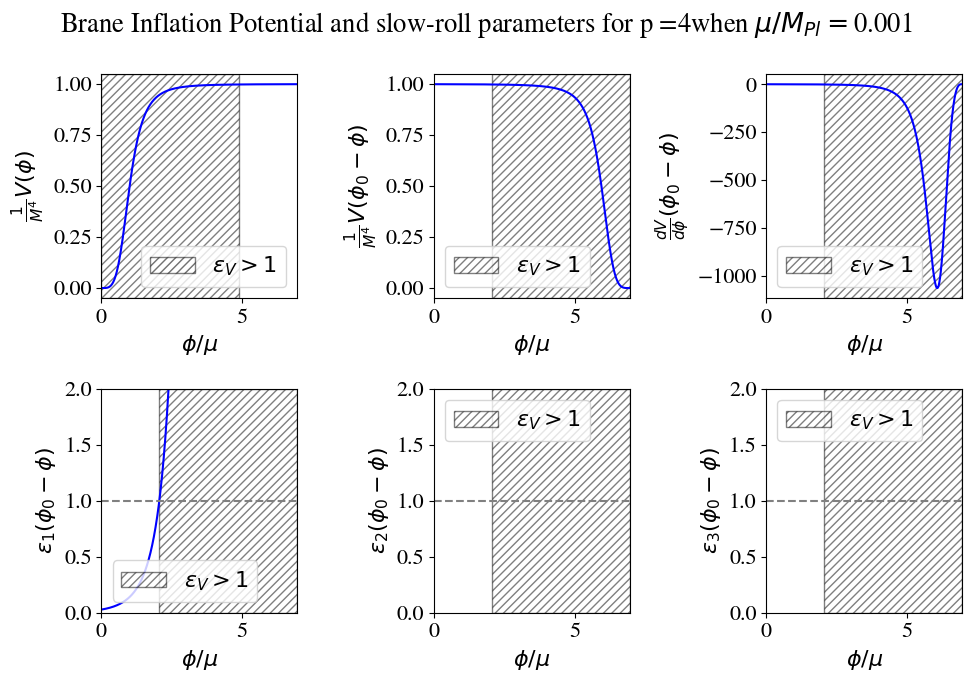

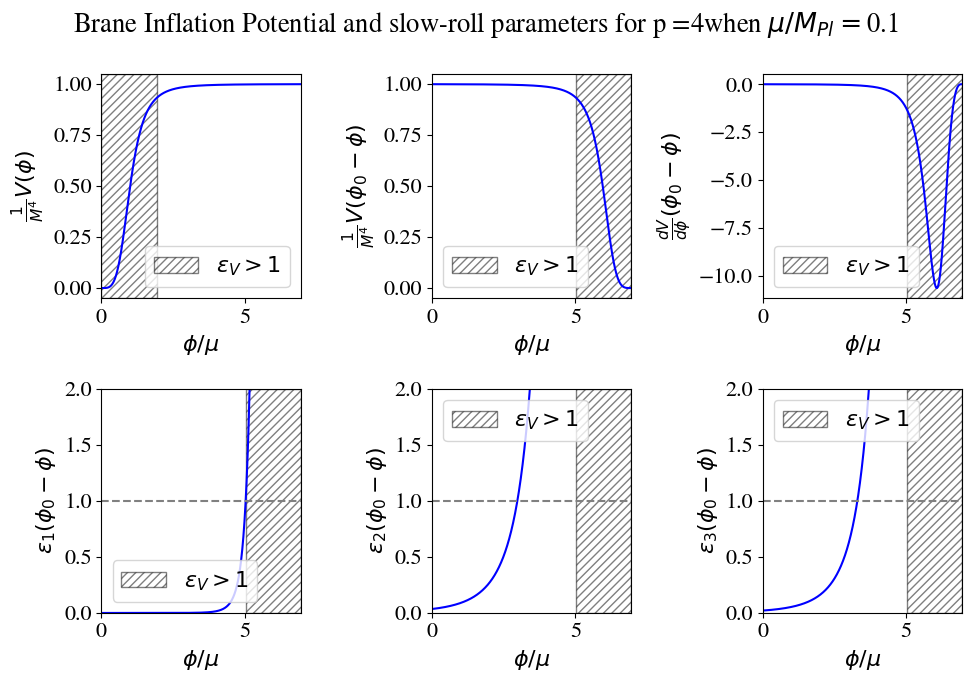

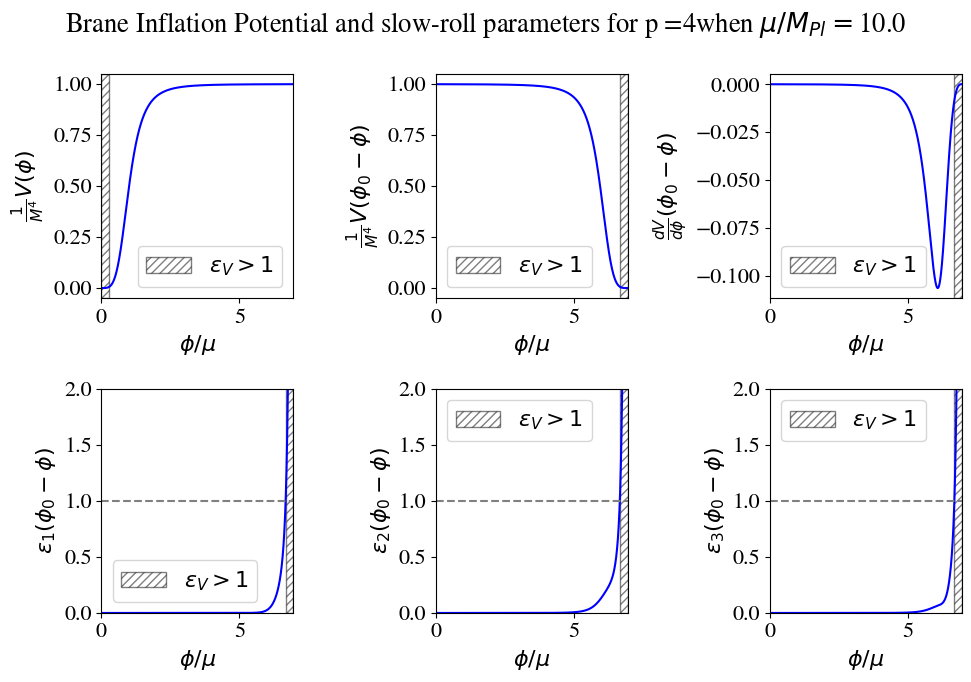

In [1240]:
def plot_flipped_and_derivative_BI():
    n=4
    liste_mu = M_pl*np.logspace(-3,1,3)
    # liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        plot_flippedBI_and_dV(liste_M4[i],liste_mu[i],n,liste_eta[i],"b")

plot_flipped_and_derivative_BI(4)

Calculate $\phi_*$

In [1241]:
from scipy import integrate

In [1242]:
def calcule_N(phi1,phi2,M4,mu,n):
    def f(phi):
        return(1/np.sqrt(2*epsilon1(phi,M4,mu,n)) )
    N = integrate.romberg(f,phi1,phi2)
    return(N)

In [1243]:
def calculate_phi_pivot(M4,mu,n,precision,DeltaN):
    
    N = 10000
    phi_deb = calculate_phi_start_BI(M4,mu,n,precision)
    phi_end = calculate_phi_end_BI(M4,mu,n,precision)
    
    list_phi = np.linspace(phi_end,phi_deb,N)
    
    list_DeltaN = []
    for phi in list_phi:
        list_DeltaN.append(calcule_N(phi_end,phi,M4,mu,n))

    i_pivot=0

    ecart = abs(list_DeltaN[0]-DeltaN)
    for i in range(len(list_phi)):
        if ecart>(list_DeltaN[i]-DeltaN):
            ecart = abs(list_DeltaN[i]-DeltaN)
            i_pivot = i
    
    print("phi_end",phi_end,"phi_pivot",list_phi[i_pivot],"phi_deb",phi_deb)
    # liste_ecart = np.abs(list_DeltaN - np.array([DeltaN for dd in list_DeltaN]) )
    # print('liste ecart à DeltaN',liste_ecart)
    return(list_phi[i_pivot])
    


In [1244]:
def calculate_all_phi_pivot(DeltaN):

    n=4
    liste_mu = M_pl*np.logspace(-3,3,1)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]

    list_phi_pivot = []
    for i in range(len(liste_mu)):
        list_phi_pivot.append(calculate_phi_pivot(liste_M4[i],liste_mu[i],n,liste_eta[i],DeltaN))
    return(list_phi_pivot)


In [1245]:
calculate_all_phi_pivot(50)
calculate_all_phi_pivot(60)
calculate_all_phi_pivot(70)

phi_end 0.004899641779242553 phi_pivot 0.006954709414939334 phi_deb 0.006954709414939334
phi_end 0.004899641779242553 phi_pivot 0.006954709414939334 phi_deb 0.006954709414939334
phi_end 0.004899641779242553 phi_pivot 0.006954709414939334 phi_deb 0.006954709414939334


[0.006954709414939334]

Values of the Slow-roll Parameters at the pivot scale

In [1246]:
def calculate_SRP_pivot(M4,mu,n,precision):
    DeltaN = 60

    phi_pivot = calculate_phi_pivot(M4,mu,n,precision,DeltaN)
    e1 = epsilon1(phi_pivot,M4,mu,n)
    e2 = epsilon2(phi_pivot,M4,mu,n)
    e3 = epsilon3(phi_pivot,M4,mu,n)

    return(e1,e2,e3)

In [1247]:
def calculate_all_SRP_pivot():
    
    n=4
    liste_mu = M_pl*np.logspace(-3,3,1)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]

    list_epsilon1_pivot = []
    list_epsilon2_pivot = []
    list_epsilon3_pivot = []

    for i in range(len(liste_mu)):
        e1,e2,e3 = calculate_SRP_pivot(liste_M4[i],liste_mu[i],n,liste_eta[i])
        list_epsilon1_pivot.append(e1)
        list_epsilon2_pivot.append(e2)
        list_epsilon3_pivot.append(e3)

    return(list_epsilon1_pivot,list_epsilon2_pivot,list_epsilon3_pivot)

In [1248]:
l1,l2,l3 = calculate_all_SRP_pivot()

print("epsilon1",l1)
print("epsilon2",l2)
print("epsilon3",l3)

phi_end 0.004899641779242553 phi_pivot 0.006954709414939334 phi_deb 0.006954709414939334
epsilon1 [0.03019457360233114]
epsilon2 [353.22544970199823]
epsilon3 [211.89904046264544]


EVERYTHING

In [1249]:
def compute_phis_BI(M4,mu,n,precision):
    DeltaN = 60
    
    N = 10000
    phi_deb = calculate_phi_start_BI(M4,mu,n,precision)
    phi_end = calculate_phi_end_BI(M4,mu,n,precision)
    
    list_phi = np.linspace(phi_end,phi_deb,N)
    
    list_DeltaN = []
    for phi in list_phi:
        list_DeltaN.append(calcule_N(phi_end,phi,M4,mu,n))

    i_pivot=0

    ecart = abs(list_DeltaN[0]-DeltaN)
    for i in range(len(list_phi)):
        if ecart>(list_DeltaN[i]-DeltaN):
            ecart = abs(list_DeltaN[i]-DeltaN)
            i_pivot = i
    
    print("phi_end",phi_end,"phi_pivot",list_phi[i_pivot],"phi_deb",phi_deb)


    return(phi_deb,list_phi[i_pivot],phi_end)

In [1250]:
def plot_FINAL_BI(M4,mu,n,eta,couleur):
    DeltaN = 60

    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,4)
    ax5 = plt.subplot(2,3,5)
    ax6 = plt.subplot(2,3,6)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta) 
    phi_end = calculate_phi_end_BI(M4,mu,n,eta)
    phi_pivot = calculate_phi_pivot(M4,mu,n,eta,DeltaN)

    list_phi = np.linspace(0,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1_shift(list_phi,phi_deb,M4,mu,n)
    E2 = epsilon2_shift(list_phi,phi_deb,M4,mu,n)
    E3 = epsilon3_shift(list_phi,phi_deb,M4,mu,n)
    E1bis = epsilon1_true(list_phi,M4,mu,n)

    dV1 = -dV_brane(phi_deb-list_phi,M4,mu,n)

    ax1.plot(list_phi/mu,V1/M4,color=couleur)
    ax1.set_ylabel(r'$\frac{1}{M^4} V(\phi)$')
    ax1.set_xlabel(r'$\phi / \mu$')

    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$\frac{1}{M^4} V(\phi_0 - \phi)$')
    ax2.set_xlabel(r'$\phi / \mu$')

    ax3.plot(list_phi/mu,dV1/M4,color=couleur)
    ax3.set_ylabel(r'$\frac{dV}{d\phi}(\phi_0-\phi)$')
    ax3.set_xlabel(r'$\phi / \mu$')

    ax4.plot(list_phi/mu,E1,color="b")
    ax5.plot(list_phi/mu,E2,color="b")
    ax6.plot(list_phi/mu,E3,color="b")
    ax4.set_ylabel(r"$\epsilon_1(\phi_0-\phi)$")
    ax5.set_ylabel(r"$\epsilon_2(\phi_0-\phi)$")
    ax6.set_ylabel(r"$\epsilon_3(\phi_0-\phi)$")

    ax4.axhline(y=1,color='grey',linestyle='--')
    ax5.axhline(y=1,color='grey',linestyle='--')
    ax6.axhline(y=1,color='grey',linestyle='--')
    
    ax4.set_ylim([0,2])
    ax5.set_ylim([0,2])
    ax6.set_ylim([0,2])
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')

    # zone where epsilon_V > 1 (inflation ends)
    ax1.axvspan(0, phi_end/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax2.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax3.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax4.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax5.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")
    ax6.axvspan((phi_deb-phi_end)/mu, phi_deb/mu, facecolor='none', edgecolor='black', hatch='////', alpha=0.5,label=r"$\epsilon_V>1$")

    ax1.axvline(x=phi_end/mu,color='red',linestyle='--')
    ax2.axvline(x=(phi_deb-phi_end)/mu,color='red',linestyle='--')
    ax3.axvline(x=(phi_deb-phi_end)/mu,color='red',linestyle='--')
    ax4.axvline(x=(phi_deb-phi_end)/mu,color='red',linestyle='--')
    ax5.axvline(x=(phi_deb-phi_end)/mu,color='red',linestyle='--')
    ax6.axvline(x=(phi_deb-phi_end)/mu,color='red',linestyle='--')

    ax1.text(phi_end/mu, 0, r'$\phi_{end}$', color='red', ha='left', va='top')
    ax2.text((phi_deb-phi_end)/mu, 0, r'$\phi_{end}$', color='red', ha='left', va='top')
    ax3.text((phi_deb-phi_end)/mu, 0, r'$\phi_{end}$', color='red', ha='left', va='top')
    ax4.text((phi_deb-phi_end)/mu, 0, r'$\phi_{end}$', color='red', ha='left', va='top')
    ax5.text((phi_deb-phi_end)/mu, 0, r'$\phi_{end}$', color='red', ha='left', va='top')
    ax6.text((phi_deb-phi_end)/mu, 0, r'$\phi_{end}$', color='red', ha='left', va='top')
    
    # value of phi_pivot start of observable inflation
    ax1.axvline(x=phi_pivot/mu,color='green',linestyle='--')
    ax2.axvline(x=(phi_deb-phi_pivot)/mu,color='green',linestyle='--')
    ax3.axvline(x=(phi_deb-phi_pivot)/mu,color='green',linestyle='--')
    ax4.axvline(x=(phi_deb-phi_pivot)/mu,color='green',linestyle='--')
    ax5.axvline(x=(phi_deb-phi_pivot)/mu,color='green',linestyle='--')
    ax6.axvline(x=(phi_deb-phi_pivot)/mu,color='green',linestyle='--')

    ax1.text(phi_pivot/mu, 0, r'$\phi_*$', color='green', ha='left', va='top')
    ax2.text((phi_deb-phi_pivot)/mu, 0, r'$\phi_*$', color='green', ha='left', va='top')
    ax3.text((phi_deb-phi_pivot)/mu, 0, r'$\phi_*$', color='green', ha='left', va='top')
    ax4.text((phi_deb-phi_pivot)/mu, 0, r'$\phi_*$', color='green', ha='left', va='top')
    ax5.text((phi_deb-phi_pivot)/mu, 0, r'$\phi_*$', color='green', ha='left', va='top')
    ax6.text((phi_deb-phi_pivot)/mu, 0, r'$\phi_*$', color='green', ha='left', va='top')
    # restrain plot to not have white blank
    # ax1.set_xlim([0,phi_deb/mu])
    # ax2.set_xlim([0,phi_deb/mu])
    # ax3.set_xlim([0,phi_deb/mu])
    # ax4.set_xlim([0,phi_deb/mu])
    # ax5.set_xlim([0,phi_deb/mu])
    # ax6.set_xlim([0,phi_deb/mu])
    # ax1.set_xlim(left=0)
    # ax2.set_xlim(left=0)
    # ax3.set_xlim(left=0)
    # ax4.set_xlim(left=0)
    # ax5.set_xlim(left=0)
    # ax6.set_xlim(left=0)

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    
    ax1.legend(loc='center right')
    ax2.legend(loc='center left')
    ax3.legend(loc='best')
    ax4.legend(loc='best')
    ax5.legend(loc='best')
    ax6.legend(loc='best')

    plt.tight_layout()
    plt.show()

phi_end 0.004899641779242553 phi_pivot 0.006954709414939334 phi_deb 0.006954709414939334


/tmp/ipykernel_20802/1761861699.py:9: RuntimeWarning: divide by zero encountered in divide
  return(M4/(1+pow(mu/phi,n)))
/tmp/ipykernel_20802/4034785085.py:4: RuntimeWarning: divide by zero encountered in divide
  return( 0.5*factor/pow(x*(pow(x,n)+1),2)  )
/tmp/ipykernel_20802/4034785085.py:11: RuntimeWarning: divide by zero encountered in divide
  return( factor*numerator/pow(denominator,2) )
/tmp/ipykernel_20802/4034785085.py:19: RuntimeWarning: divide by zero encountered in divide
  return( factor * numerator / denominator)
/tmp/ipykernel_20802/544478273.py:3: RuntimeWarning: invalid value encountered in divide
  return(factor*pow(dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n),2)  )


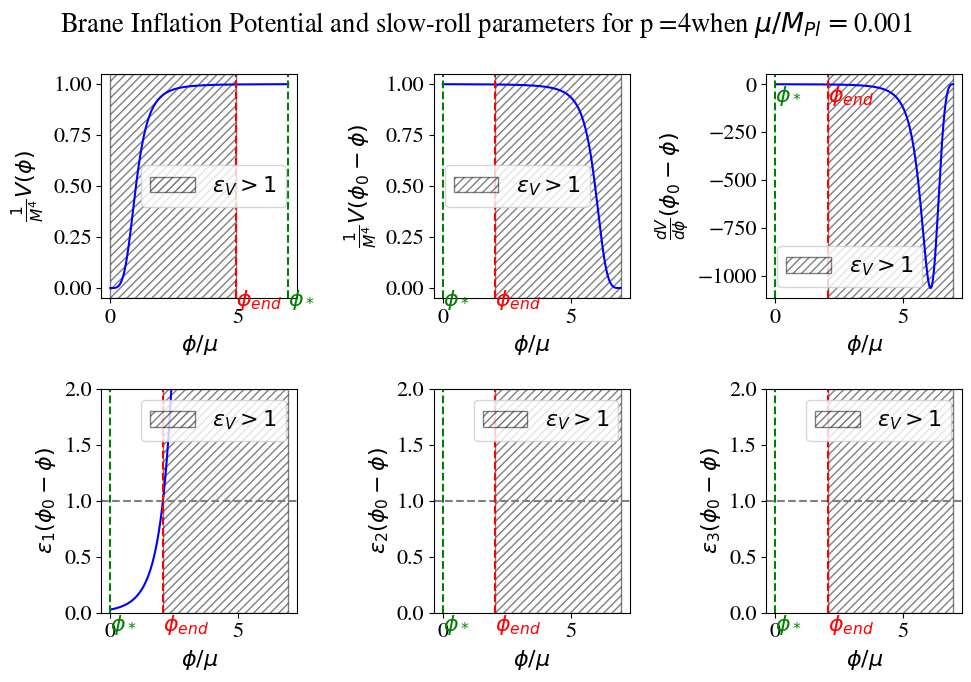

phi_end 0.030857658779732126 phi_pivot 0.06954709414939333 phi_deb 0.06954709414939333


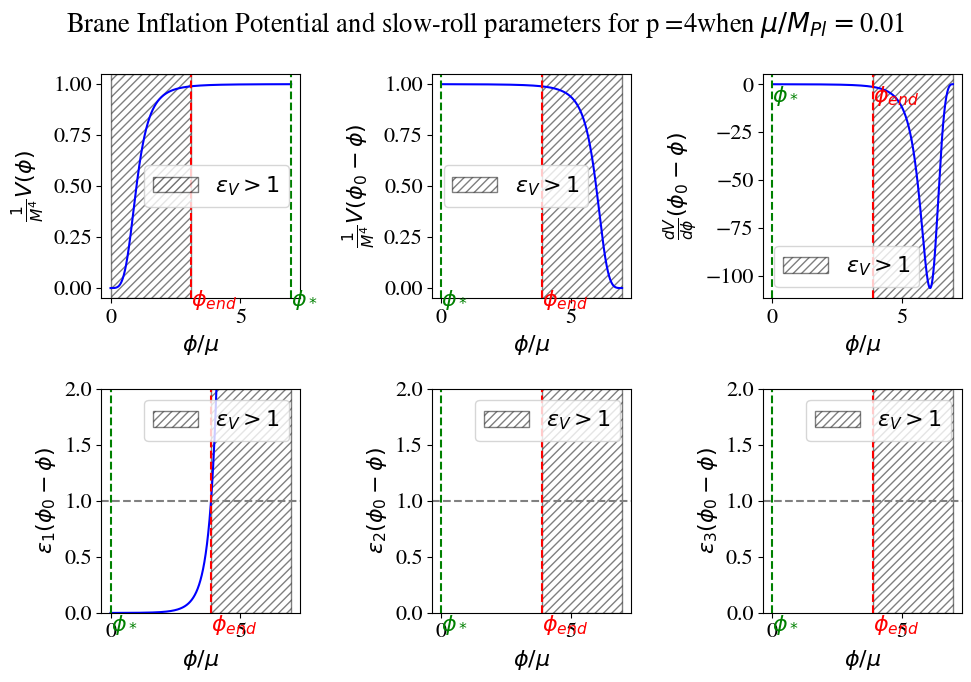

phi_end 0.19239700522493397 phi_pivot 0.6954709414939334 phi_deb 0.6954709414939334


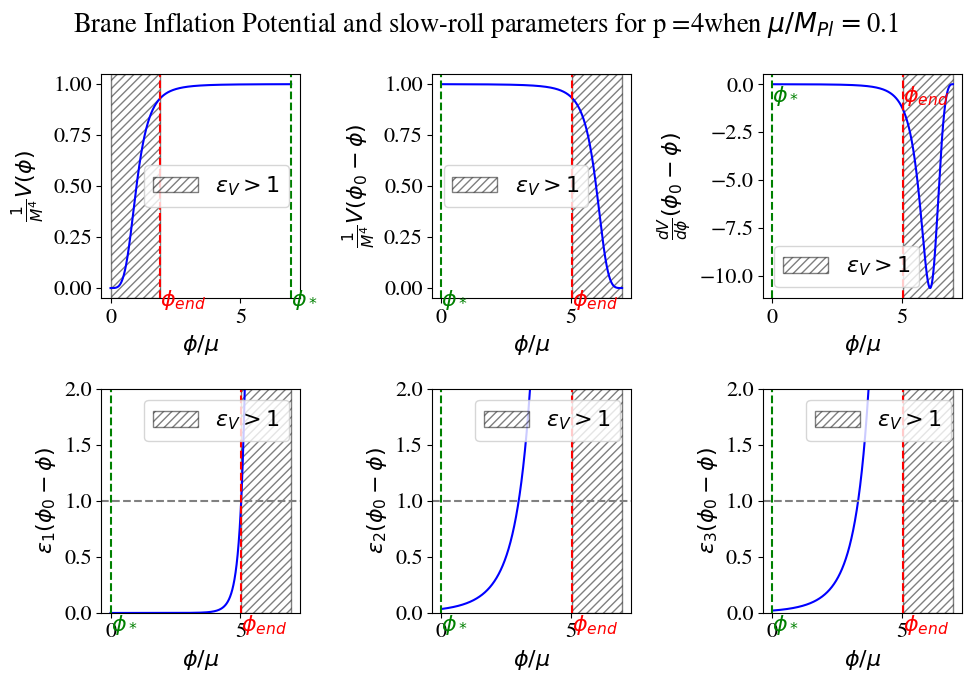

phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334


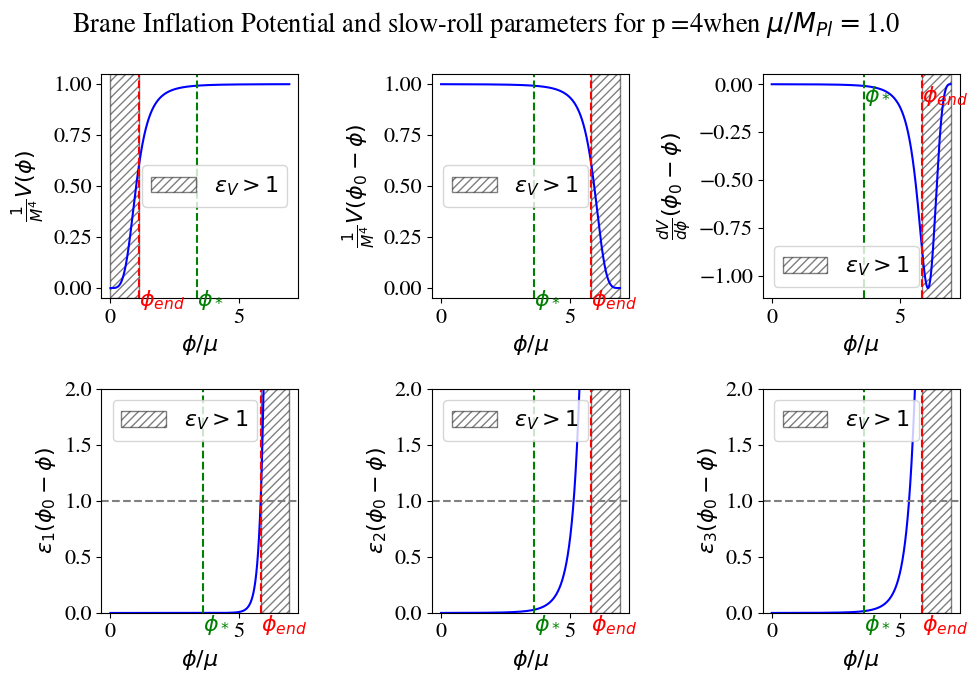

phi_end 2.811121656735046 phi_pivot 14.290856898996498 phi_deb 69.54709414939333


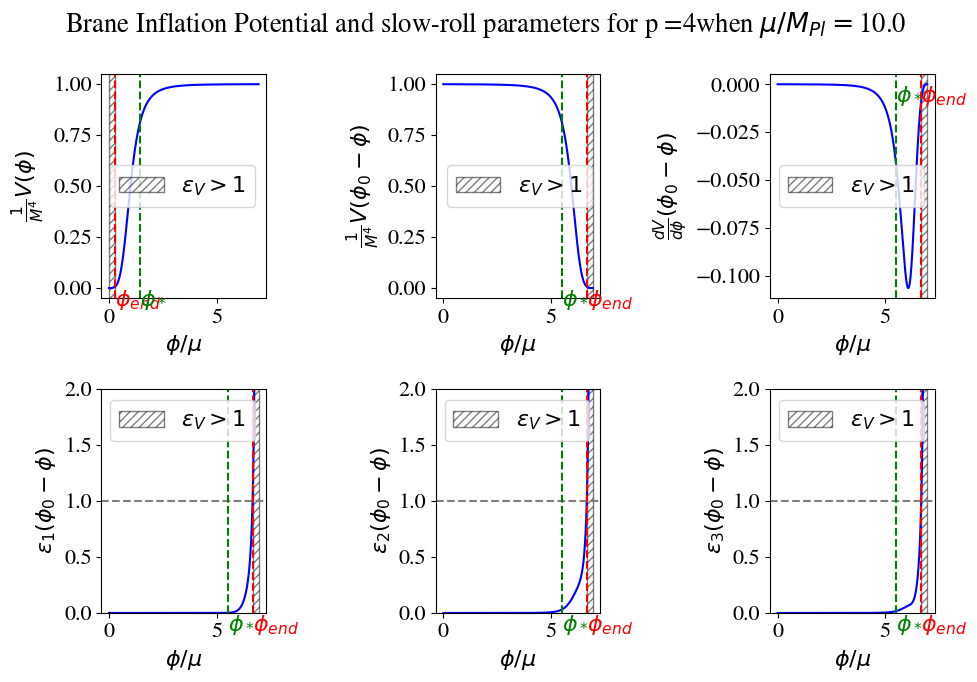

phi_end 2.830595037830687 phi_pivot 22.087922402046768 phi_deb 695.4709414939334


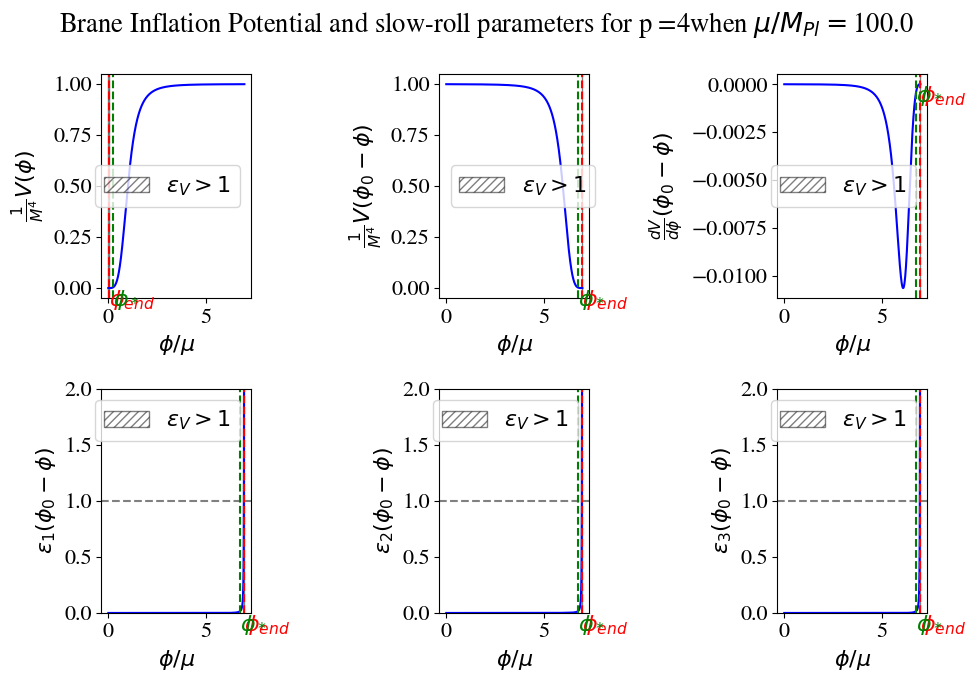

phi_end 2.8514593747188743 phi_pivot 22.31860836519885 phi_deb 6954.709414939334


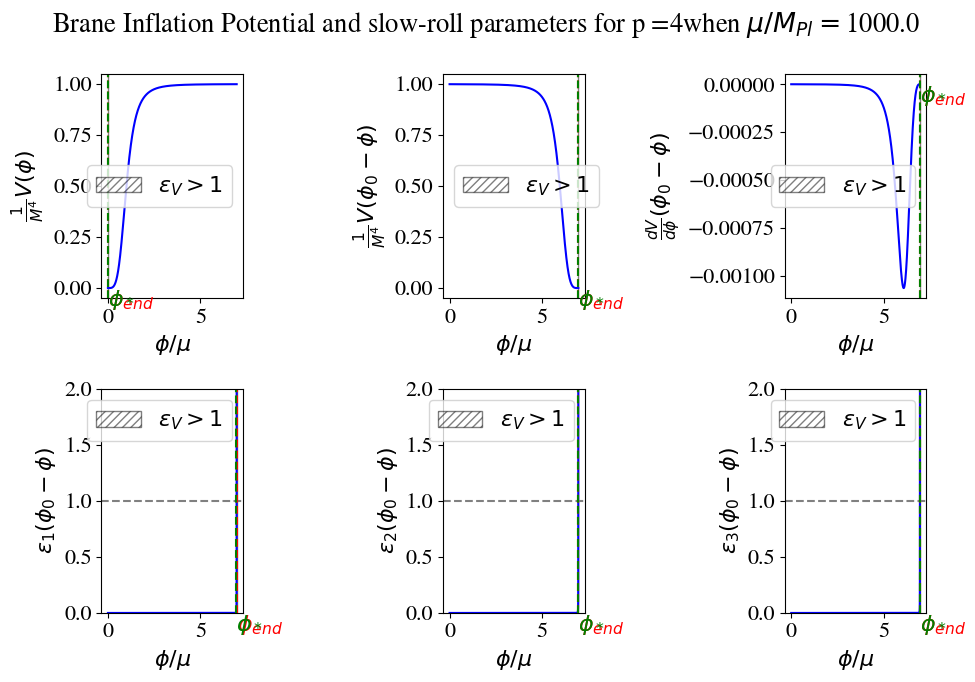

In [1262]:
def plot_all_FINAL_BI():
    
    n=4
    liste_mu = M_pl*np.logspace(-3,3,7)
    # liste_mu = M_pl*np.logspace(-3,3,3)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        # plot_FINAL_BI(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,N))
        plot_FINAL_BI(liste_M4[i],liste_mu[i],n,liste_eta[i],"b")

plot_all_FINAL_BI()

Cosmological Model

In [1287]:
def essai(liste_mu,facteur):

    cosmo=[]

    # 0th - Analytical one (we just give the parameters for the power spectra that we know from observations)

    cosmo += [Class()]
    cosmo[0].set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842, 'r':1, 'k_pivot':0.05})
    cosmo[0].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    cosmo[0].set({'modes':'s,t'})   
    cosmo[0].set({'Pk_ini_type':'analytic_Pk'}) 

    ## All the rest : we calculate perturbatively
    # 1st - Classical polynomial with potential parameters
    
    n=4

    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu) for mu in liste_mu ]    

    for i in range(len(liste_mu)):
        mu = liste_mu[0]
        M4 = liste_M4[0]
        eta = liste_eta[0]
        phi_start = calculate_phi_start_BI(M4,mu,n,eta)
        phi_end = calculate_phi_end_BI(M4,mu,n,eta)
        phi_pivot = calculate_phi_pivot(M4,mu,n,eta,60)
        e1,e2,e3 = calculate_SRP_pivot(M4,mu,n,eta)
        e0 = pow(10,-9-i*facteur)
        # e2 = 4*e1
        # e3 = 4*e1
        # e0 = 1

        cosmo += [Class() ]
        cosmo[i+1].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
        cosmo[i+1].set({'modes':'s,t'})   
        cosmo[i+1].set({'Pk_ini_type':'inflation_V'})  
        cosmo[i+1].set({'potential':'polynomial'})
        cosmo[i+1].set({'PSR_0':e0,'PSR_1':e1,'PSR_2':e2,'PSR_3':e3,'PSR_4':0.})


    # cosmo += [Class() ]
    # cosmo[1].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # cosmo[1].set({'modes':'s,t'})   
    # cosmo[1].set({'Pk_ini_type':'inflation_V_end'})  
    # cosmo[1].set({'full_potential':'KKLT_mirror'})
    # cosmo[1].set({'Vparam0':M4,'Vparam1':mu,'Vparam2':n,'Vparam3':phi_start,'Vparam4':0.})   
    # cosmo[1].set({'phi_end':phi_start*99./100}) 

        print("Essai",i+1)
        print(r"$M^4$",M4)
        print(r"$\mu$",mu)
        print(r"$\phi_{start}$",phi_start)
        print(r'$\phi_{pivot}$',phi_pivot)
        print(r"$\phi_{end}$",phi_end)
        print('')
        print('epsilon1',e1)
        print('epsilon2',e2)
        print('epsilon3',e3)
        print("")
    
    return(cosmo)



Plotting parameters (labels, colors, ...)

In [1280]:
import matplotlib.cm as cm

def couleur(i,N):
    myColorMap = cm.get_cmap('Dark2')
    return(myColorMap((i+1)/N))

def parametres(liste_mu):
    # l_label= [["Analytical",""],['polynomial','PSR_i'],['KKLT_mirror',''],['','']]
    # style = [ '-','--','--','--']
    # C=['crimson','mediumspringgreen','b','orange','violet','indigo']
    
    l_label = [ ["Anlaytical",""]]
    style = [ '-' ]
    C = ['crimson']

    for i in range(len(liste_mu)):
        l_label.append(["PSR",r"$\mu = $"+str(liste_mu[i])])
        style.append('--')
        C.append(couleur(i,len(liste_mu)))
    
    return(l_label,style,C)

CLASS Computation

In [1254]:
def class_compute(cosmo):

    N=len(cosmo)
    for i in range(N):
        cosmo[i].compute()
    primo = [ cosmo[i].get_primordial() for i in range(N)]
    return(cosmo,primo)

Observables

In [1255]:
def class_observables(cosmo,primo):
    ###### ----- Extracting valuable data  (k, power spectra Ps(k), ...  correlation function in harmonic   Cl, ClT, ... ) ---- #####
    ##  List of keys :  'tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'
    N=len(cosmo)
    l_max_scalars= 2500
    l_max_tensors = 600


    kk = [ primo[i]['k [1/Mpc]'] for i in range(N)]

    P_s= [ primo[i]['P_scalar(k)'] for i in range(N) ]
    P_t= [ primo[i]['P_tensor(k)'] for i in range(N) ]

    #cls = [ cosmo[i].raw_cl(l_max_tensors) for i in range(N) ]
    cls = [cosmo[i].lensed_cl(2500) for i in range(N)]
    ll = [cls[i]['ell'][2:] for i in range(N)]
    clTT = [cls[i]['tt'][2:] for i in range(N)]
    clEE = [cls[i]['ee'][2:] for i in range(N)]
    clTE = [cls[i]['te'][2:] for i in range(N)]
    clBB = [cls[i]['bb'][2:] for i in range(N)]
    clPP = [cls[i]['pp'][2:] for i in range(N)]
    clTP = [cls[i]['tp'][2:] for i in range(N)]

    h = [ cosmo[i].h() for i in range(N) ] # get reduced Hubble for conversions to 1/Mpc

    return(kk,P_s,P_t,cls,ll,clTT,clEE,clTE,clBB,clPP,clTP)



Plotting

In [1256]:
import matplotlib


def class_plot_Pk(P_s,P_t,kk,C,style,l_label):
    N=len(kk)
    for i in range(N):
        plt.loglog(kk[i],P_s[i],color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    

    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.title(r"")

    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


def class_plot_Cl_TT(ll,clTT,C,style,l_label):
    N=len(ll)
    from math import pi

    plt.figure(1)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
    for i in range(N):
        plt.plot(ll[i],clTT[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

def class_plot_Cl_BB(ll,clBB,C,style,l_label):
    N=len(ll)
    # plot C_l^BB
    from math import pi

    plt.figure(1)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{BB}$')
    for i in range(N):
        plt.plot(ll[i],clBB[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

def class_plot_Cl_EE(ll,clEE,C,style,l_label):
    N=len(ll)
    from math import pi

    plt.figure(1)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
    for i in range(N):
        plt.plot(ll[i],clEE[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

def class_plot_Cl_TP(ll,clTP,C,style,l_label):
    N=len(ll)
    from math import pi

    plt.figure(1)
    plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TP}$')
    for i in range(N):
        plt.plot(ll[i],clTP[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

In [1257]:
def class_plot(cosmo,primo,C,style,l_label):
    font = {'size'   : 16, 'family':'STIXGeneral'}
    axislabelfontsize='large'
    matplotlib.rc('font', **font)
    matplotlib.rcParams['legend.fontsize']='medium'
    plt.rcParams["figure.figsize"] = [8.0,6.0]
    
    kk,P_s,P_t,cls,ll,clTT,clEE,clTE,clBB,clPP,clTP=class_observables(cosmo,primo)
    class_plot_Pk(P_s,P_t,kk,C,style,l_label)
    class_plot_Cl_EE(ll,clEE,C,style,l_label)
    class_plot_Cl_BB(ll,clBB,C,style,l_label)
    class_plot_Cl_TT(ll,clTT,C,style,l_label)
    class_plot_Cl_TP(ll,clTP,C,style,l_label)

In [1258]:
def class_ALL(cosmo,list_mu):
    
    cosmo,primo = class_compute(cosmo)
    l_label,style,C = parametres(list_mu)
    class_plot(cosmo,primo,C,style,l_label)

In [1293]:
def essai_ALL(facteur):
    list_mu = M_pl*np.logspace(-1,1,2)
    list_mu = M_pl*np.linspace(1,7,7)

    class_ALL(essai(list_mu,facteur) , list_mu )

phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334
phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334
Essai 1
$M^4$ 23.39461783961922
$\mu$ 1.0
$\phi_{start}$ 6.954709414939334
$\phi_{pivot}$ 3.349387362293051
$\phi_{end}$ 1.1138773986706705

epsilon1 4.431613135904593e-05
epsilon2 0.02793077405726239
epsilon3 0.01670539757884311

phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334
phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334
Essai 2
$M^4$ 23.39461783961922
$\mu$ 1.0
$\phi_{start}$ 6.954709414939334
$\phi_{pivot}$ 3.349387362293051
$\phi_{end}$ 1.1138773986706705

epsilon1 4.431613135904593e-05
epsilon2 0.02793077405726239
epsilon3 0.01670539757884311

phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334
phi_end 1.1138773986706705 phi_pivot 3.349387362293051 phi_deb 6.954709414939334
Essai 3
$M^4$ 23.39461783961922
$\mu$ 1.0
$\phi_{sta

/tmp/ipykernel_20802/243775149.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  myColorMap = cm.get_cmap('Dark2')


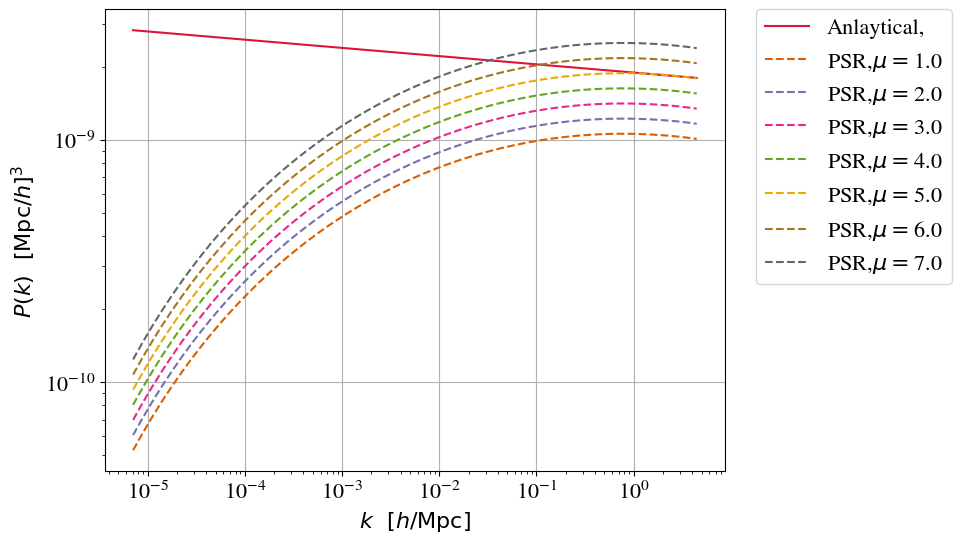

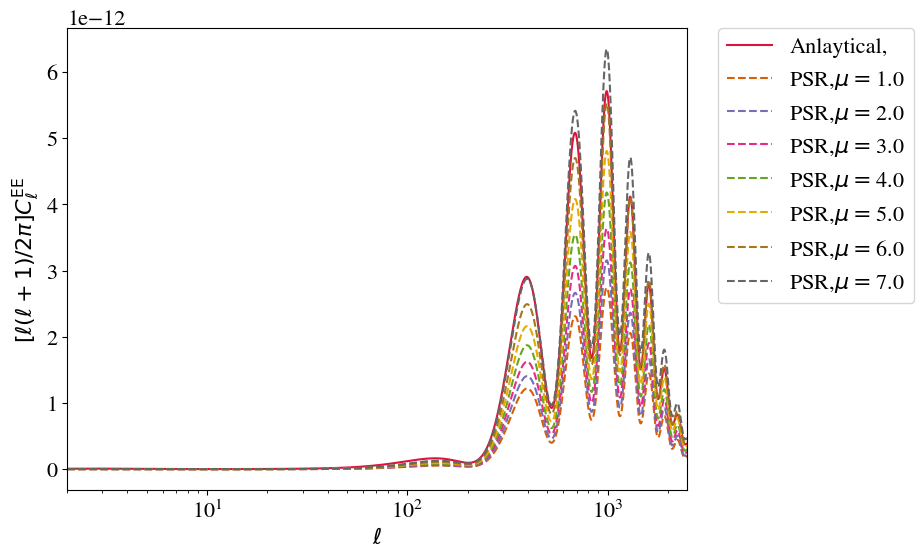

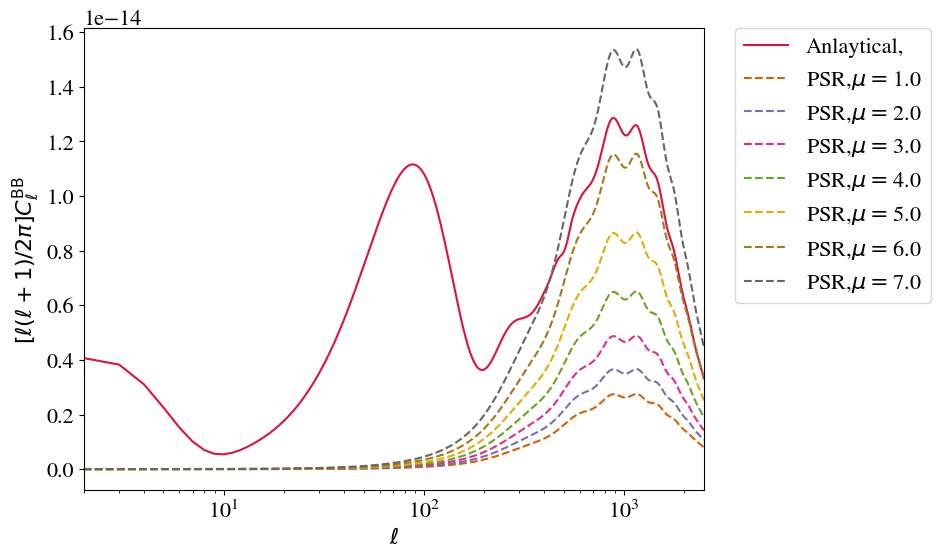

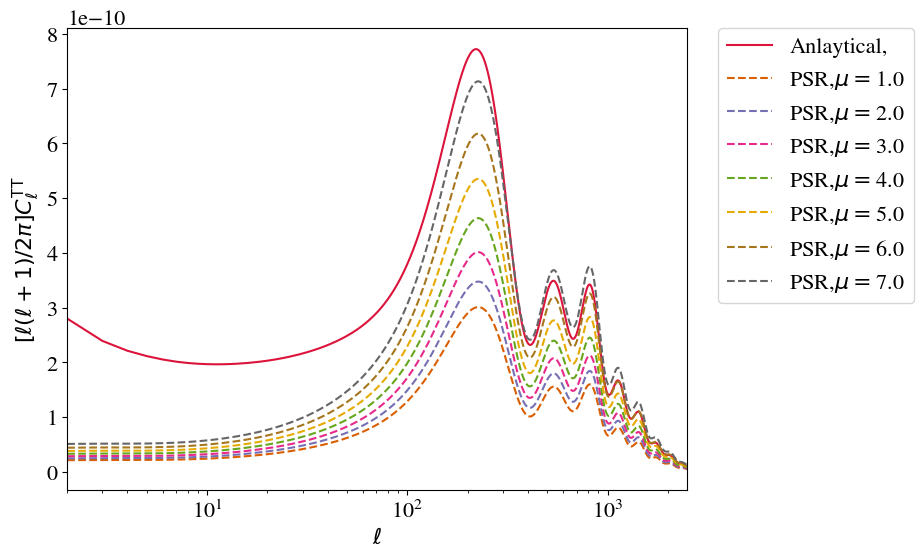

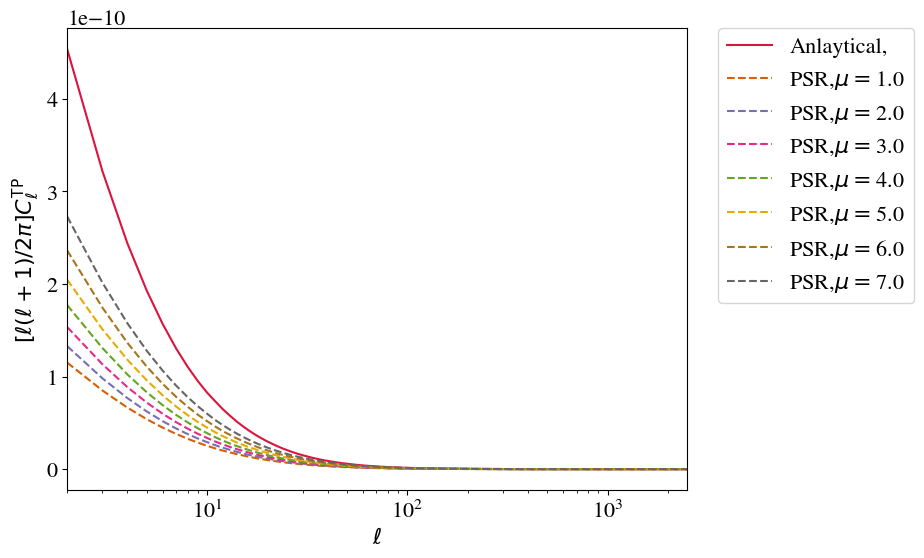

In [1294]:
essai_ALL(-1/16)